# 1. 匯入資料
這邊有先把 .xlsx 的檔案先換成 .csv 的格式會比較好處理

ps. 要用 big5 編碼不然中文字會是亂碼喔~

In [1]:
import pandas as pd
with open("retaildata.csv", encoding="big5", errors='ignore') as f:
    df = pd.read_csv(f)

匯入的資料如下 : 

In [2]:

df

,salesDate,salesdate,uniqueOrderID,productNo,productName,quantity,unitSalesPrice,sales,companyOrder,offline1salesChannel,memberID,memberType,Unnamed: 12,Unnamed: 13
0,6/22/2018,2018-0622,2018-0622-001-00010-007,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,1,1,`0000201667880,金賺會員,NaN,NaN
1,6/22/2018,2018-0622,2018-0622-001-00010-007,F6034032,6-TC線3LD.轉RJ45@,1,699.0,699,1,1,`0000201667880,金賺會員,NaN,NaN
2,5/8/2018,2018-0508,2018-0508-001-00171-007,H7070100,8-HD線HDMI-1.2MM(通),1,269.0,269,0,1,`0000201667880,金賺會員,NaN,NaN
3,9/29/2018,2018-0929,2018-0929-001-00075-007,F6030844,6-TC線ONPRO.1.2M黑,1,198.0,198,1,1,`0000201667880,金賺會員,NaN,NaN
4,5/8/2018,2018-0508,2018-0508-001-00171-007,F6033049,6-USB充2.4A2U藍(ONPR,1,269.0,269,0,1,`0000201667880,金賺會員,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620831,9/27/2018,2018-0927,2018-0927-001-00019-023,D5080085,4-TL放大3.5xMA-023伸,1,350.0,350,1,1,`0000200779164,金賺會員,NaN,NaN
620832,9/27/2018,2018-0927,2018-0927-001-00019-023,H4031510,5-PKMT-7051三合一網路,1,480.0,480,1,1,`0000200779164,金賺會員,NaN,NaN
620833,9/27/2018,2018-0927,2018-0927-001-00019-023,F2223487,6-WLMAC.ASUSAC53,1,1188.0,1188,1,1,`0000200779164,金賺會員,NaN,NaN
620834,5/31/2018,2018-0531,2018-0531-003-00057-013,F6032177,7-ATM逸.ATM讀卡CR8白,1,199.0,199,1,1,`0000201950869,金賺會員,NaN,NaN


# 2. 統計數據

總共有 15877 種不同的商品

In [3]:
len(df.productName.astype('string').unique())

15877

總共有 377485 筆交易

In [4]:
len(df.uniqueOrderID.unique())

377485

同商品在不同時間的價格不一樣

In [5]:
df[df['productName']=='6-LC登.U2NET112H+HUB']

,salesDate,salesdate,uniqueOrderID,productNo,productName,quantity,unitSalesPrice,sales,companyOrder,offline1salesChannel,memberID,memberType,Unnamed: 12,Unnamed: 13
0,6/22/2018,2018-0622,2018-0622-001-00010-007,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,1,1,`0000201667880,金賺會員,NaN,NaN
10417,8/19/2019,2019-0819,2019-0819-001-00065-007,F2061272,6-LC登.U2NET112H+HUB,1,315.0,315,0,1,`0623000167834,金賺會員,NaN,NaN
19401,9/1/2018,2018-0901,2018-0901-001-00013-00T,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,0,1,`0622000063481,金賺會員,NaN,NaN
19973,2/3/2019,2019-0203,2019-0203-002-00187-008,F2061272,6-LC登.U2NET112H+HUB,1,369.0,369,0,1,`0000201556825,金賺會員,NaN,NaN
19974,2/3/2019,2019-0203,2019-0203-002-00187-008,F2061272,6-LC登.U2NET112H+HUB,1,369.0,369,0,1,`0000201556825,金賺會員,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614895,9/2/2018,2018-0902,2018-0902-001-00094-008,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,0,1,`0633000232654,金賺會員,NaN,NaN
615112,6/10/2018,2018-0610,2018-0610-001-00061-00C,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,0,1,`0000200894133,金賺會員,NaN,NaN
617536,3/19/2018,2018-0319,2018-0319-001-00053-007,F2061272,6-LC登.U2NET112H+HUB,1,399.0,399,1,1,`0000201464533,金賺會員,NaN,NaN
618219,11/20/2018,2018-1120,2018-1120-001-00135-007,F2061272,6-LC登.U2NET112H+HUB,1,369.0,369,1,1,`0623000084117,金賺會員,NaN,NaN


# 3. 合併不同列但屬於同一筆交易的資料

初始資料將同筆交易的不同商品拆分成不同列的資料，在做購物籃分析之前，我們需要先將每個購物籃的商品整合在一起

In [6]:
df_merge = df.groupby(['uniqueOrderID']).agg(lambda x: x.tolist())

按照不同的交易編號合併後 : (有點醜XD)

In [7]:
df_merge = df_merge.drop(['salesdate','Unnamed: 12','Unnamed: 13'],axis=1) #有2個 salesdate 刪掉其中一個

In [8]:
df_merge

,salesDate,productNo,productName,quantity,unitSalesPrice,sales,companyOrder,offline1salesChannel,memberID,memberType
uniqueOrderID,,,,,,,,,,
2017-1021-001-00001-002,"[10/21/2017, 10/21/2017]","[F2221060, F6033434]","[6-WLMAC.ASUSAC1200, 6-Mic線群.AM50CM%]","[1, 1]","[1399.0, 129.0]","[1399, 129]","[0, 0]","[1, 1]","[`0000200865522, `0000200865522]","[金賺會員, 金賺會員]"
2017-1021-001-00001-008,[10/21/2017],[F4040379],[6-MOULG.M100r2代1000d],[1],[299.0],[299],[0],[1],[`0000200866970],[金賺會員]
2017-1021-001-00002-002,[10/21/2017],[D5060116],[4-TL組PK-601模型專用],[1],[380.0],[380],[0],[1],[`0000200662664],[金賺會員]
2017-1021-001-00002-006,[10/21/2017],[F4420139],[6-DCMSATFUltra64G],[1],[789.0],[789],[0],[1],[`0631000040545],[金賺會員]
2017-1021-001-00003-007,[10/21/2017],[F6033854],[6-TC線SONY.AM(U2)1M%],[1],[390.0],[390],[0],[1],[`13205217],[金賺會員]
...,...,...,...,...,...,...,...,...,...,...
2019-1021-005-00032-001,[10/21/2019],[D1130456],[4-PS延N群.S66272.7M],[1],[599.0],[599],[1],[1],[`0612000069989],[金賺會員]
2019-1021-005-00038-001,"[10/21/2019, 10/21/2019, 10/21/2019, 10/21/201...","[G3020050, G3020052, K1020213, K1020212, K1020...","[7-40P彩排公-母10cm, 7-40P彩排母-母10cm, 位移莆.超音波支架, 位移...","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[50.0, 50.0, 45.0, 65.0, 120.0, 120.0, 629.0, ...","[50, 50, 45, 65, 120, 120, 629, 10, 25]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[`0000200485300, `0000200485300, `000020048530...","[金賺會員, 金賺會員, 金賺會員, 金賺會員, 金賺會員, 金賺會員, 金賺會員, 金賺會..."
2019-1021-005-00040-001,"[10/21/2019, 10/21/2019, 10/21/2019]","[G1040327, D2060309, G9011010]","[7-整線魔鬼氈黏扣帶*2, 7-C刷除塵刷半月型攜帶, 7-C布E-booksA8藍]","[1, 1, 1]","[110.0, 85.0, 59.0]","[110, 85, 59]","[0, 0, 0]","[1, 1, 1]","[`0611000212463, `0611000212463, `0611000212463]","[金賺會員, 金賺會員, 金賺會員]"


顯示前五筆交易買了什麼 : 

In [9]:
df_merge["productName"][0:5]

uniqueOrderID
2017-1021-001-00001-002    [6-WLMAC.ASUSAC1200, 6-Mic線群.AM50CM%]
2017-1021-001-00001-008                   [6-MOULG.M100r2代1000d]
2017-1021-001-00002-002                        [4-TL組PK-601模型專用]
2017-1021-001-00002-006                      [6-DCMSATFUltra64G]
2017-1021-001-00003-007                    [6-TC線SONY.AM(U2)1M%]
Name: productName, dtype: object

我們前面合併完同筆資料的不同商品後，接著將這些不同的購物籃放到一個 list 形成2維的 list

In [10]:
carts = []
for j in df_merge["productName"]:
    arr = []
    for i in j:
        arr.append(''.join(i))
    carts.append(arr)

形成的二維 list 如下 : 

In [11]:
carts

[['6-WLMAC.ASUSAC1200', '6-Mic線群.AM50CM%'],
 ['6-MOULG.M100r2代1000d'],
 ['4-TL組PK-601模型專用'],
 ['6-DCMSATFUltra64G'],
 ['6-TC線SONY.AM(U2)1M%'],
 ['6-DCMSATFEX32GA1'],
 ['6-K+MTT.軍令官2代', 'HD外25S新黑鑽2T'],
 ['8-HD轉i-wizPC-8'],
 ['6-PEN威UV12816G黃', '6-PEN威UV12816G藍'],
 ['6-電源線P4轉P8PR-19彰', '6-電源8P轉大4P*2主板彰', '7-得倫腰果(鹽酥)'],
 ['6-AP線套LD.發光藍'],
 ['6-簡-LG.R400紅光!'],
 ['6-IPCAM-360.小水滴503@', '6-DCM-創TF32GUHS-I@'],
 ['6-LCD-LG24MP48HQ@'],
 ['3-WA-9德.法.印尼.韓國'],
 ['6-HUBZyXGS-105BV3鐵',
  '6-PAD廣.霓彩小MPE01棕',
  '4-TL萬力PD-372迷你(PK',
  '4-CL劑-冷氣機噴420ML%'],
 ['6-DVDRW創見羽量級白'],
 ['4-CL劑帝CL707電子接'],
 ['5-水銀CR2032*1PHILIP'],
 ['6-MOUIR.IRM09W闇黑版'],
 ['6-BT4逸.傳輸器D704'],
 ['6-PEN創JF79016G白', '6-PEN創JF79016G白'],
 ['6-WLMAC.ASUSAC66U+'],
 ['6-USB充3.1A2U黑飛@'],
 ['8-VC緯3.5STM-2RM5FT', '6-SP-JS.JY30302.1/50@'],
 ['6-WLMN.DLKDIR-612'],
 ['6-USB2HUB明.4P鋁合金'],
 ['5-水銀CR2032*1PHILIP', '5-水銀CR2032*1PHILIP'],
 ['6-USB3線昶.A-AM1.8M', '6-USB3線昶.A-AM1.8M'],
 ['8-VC緯3.5STM-M金6FT'],
 ['6-MOULG.M280紅2.4G'],
 ['4-PI剝皮8PK-3001D(

# 4. 購物籃分析

這邊借助 apriori 演算法幫我們找出不同商品之間的關聯性

但 apriori 不適合用在處理過大資料，因為運算效率不好 XD

min support 怎麼來的? 這邊我是隨便先設 0.0005 ，意思是總共在 377485 個購物車內，同樣的商品出現在 188 個購物車內

min confidence 怎麼來的? 先隨便設，在從跑出的結果選一個比較是當的數值

(ps. 這邊不考慮"是否是金賺會員"、"是否是公司單位訂購"、"是否是實體消費"，不然其實還可以做更細部的分析，鎖定更特定的客群~)

In [12]:
## Import package
from apyori import apriori
## Data 自行定義數據
association_rules = apriori(carts, min_support=0.0005, min_confidence=0.7)
association_results = list(association_rules)

顯示所有符合要求的關聯規則 (25條規則)

In [13]:
for product in association_results:
    print('Shopping Cart: '+str(list(product[0]))) # ex. ['Basketball', 'Socks']
    print("Rule: " + str(''.join(list(product[2][0][0]))) + " → " + str(', '.join(list(product[2][0][1]))))
    print("Support: " + str(product[1]))
    print("Confidence: " + str(product[2][0][2]))
    print("Lift: " + str(product[2][0][3]))
    print("==================================")

Shopping Cart: ['6-EX9.5mm秉外接盒', '6-EX9.5mm秉硬碟盒']
Rule: 6-EX9.5mm秉外接盒 → 6-EX9.5mm秉硬碟盒
Support: 0.000537769712703816
Confidence: 0.7660377358490565
Lift: 632.7521985054292
Shopping Cart: ['6-INK-EPT664200', '6-INK-EPT664100']
Rule: 6-INK-EPT664200 → 6-INK-EPT664100
Support: 0.0010728903135223916
Confidence: 0.8598726114649682
Lift: 528.6466005518787
Shopping Cart: ['6-INK-EPT664100', '6-INK-EPT664300']
Rule: 6-INK-EPT664300 → 6-INK-EPT664100
Support: 0.001080837649178113
Confidence: 0.8553459119496856
Lift: 525.8636019093275
Shopping Cart: ['6-INK-EPT664400', '6-INK-EPT664100']
Rule: 6-INK-EPT664400 → 6-INK-EPT664100
Support: 0.0010887849848338345
Confidence: 0.8598326359832635
Lift: 528.6220237689613
Shopping Cart: ['6-INK-EPT664200', '6-INK-EPT664300']
Rule: 6-INK-EPT664200 → 6-INK-EPT664300
Support: 0.0012159423553253772
Confidence: 0.9745222929936307
Lift: 771.2107919721188
Shopping Cart: ['6-INK-EPT664200', '6-INK-EPT664400']
Rule: 6-INK-EPT664200 → 6-INK-EPT664400
Support: 0.00121

# 5. 哪一條規則可以帶來最可觀的收益?

先把找出的 25 條規則包含的商品放到 list 裡

In [14]:
distinct_products = [] #只放不重複的
for product in association_results:
    for item in list(product[0]):
        if(item not in distinct_products):
            distinct_products.append(item)
distinct_products

['6-EX9.5mm秉外接盒',
 '6-EX9.5mm秉硬碟盒',
 '6-INK-EPT664200',
 '6-INK-EPT664100',
 '6-INK-EPT664300',
 '6-INK-EPT664400',
 '6-INKEPT00V100黑',
 '6-INKEPT00V300紅',
 '6-INKEPT03Y100黑防',
 '6-INKEPT03Y200藍',
 '6-INKEPT03Y300紅',
 '6-INKEPT03Y400黃',
 '其他SE樹莓派散熱器',
 '主板RaspberryPI3B+']

可是商品價格不一樣... 先取價格平均值

In [15]:
products_mean_price = {}
for i in distinct_products:
    products_mean_price[i] = round(df.groupby("productName").get_group(i)['unitSalesPrice'].mean())
products_mean_price

{'6-EX9.5mm秉外接盒': 243,
 '6-EX9.5mm秉硬碟盒': 246,
 '6-INK-EPT664200': 280,
 '6-INK-EPT664100': 283,
 '6-INK-EPT664300': 280,
 '6-INK-EPT664400': 281,
 '6-INKEPT00V100黑': 282,
 '6-INKEPT00V300紅': 281,
 '6-INKEPT03Y100黑防': 474,
 '6-INKEPT03Y200藍': 280,
 '6-INKEPT03Y300紅': 280,
 '6-INKEPT03Y400黃': 281,
 '其他SE樹莓派散熱器': 41,
 '主板RaspberryPI3B+': 1539}

計算每條規則的收益期望值

In [17]:
cart_under_rule = {}
for product in association_results:
    sum = 0
    for item in list(product[0]):
        sum += products_mean_price[item]
    sum = sum*product[1]
    cart_under_rule[str(''.join(list(product[2][0][0]))) + " → " + str(', '.join(list(product[2][0][1])))] = sum

cart_under_rule


{'6-EX9.5mm秉外接盒 → 6-EX9.5mm秉硬碟盒': 0.26296938951216603,
 '6-INK-EPT664200 → 6-INK-EPT664100': 0.6040372465131064,
 '6-INK-EPT664300 → 6-INK-EPT664100': 0.6085115964872776,
 '6-INK-EPT664400 → 6-INK-EPT664100': 0.6140747314462827,
 '6-INK-EPT664200 → 6-INK-EPT664300': 0.6809277189822113,
 '6-INK-EPT664200 → 6-INK-EPT664400': 0.6821436613375366,
 '6-INK-EPT664300 → 6-INK-EPT664400': 0.6880882684080162,
 '6-INKEPT00V100黑 → 6-INKEPT00V300紅': 0.28337549836417336,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y200藍': 0.5353113368743129,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y300紅': 0.5373087672357841,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y400黃': 0.5340212193862007,
 '6-INKEPT03Y200藍 → 6-INKEPT03Y300紅': 0.39906221439262485,
 '6-INKEPT03Y200藍 → 6-INKEPT03Y400黃': 0.4057194325602342,
 '6-INKEPT03Y300紅 → 6-INKEPT03Y400黃': 0.39680252195451476,
 '其他SE樹莓派散熱器 → 主板RaspberryPI3B+': 1.2556790336039843,
 '6-INK-EPT664200 → 6-INK-EPT664100, 6-INK-EPT664300': 0.8955137290223453,
 '6-INK-EPT664200 → 6-INK-EPT664400, 6-INK-EPT664100': 0

規則的收益期望值視覺化

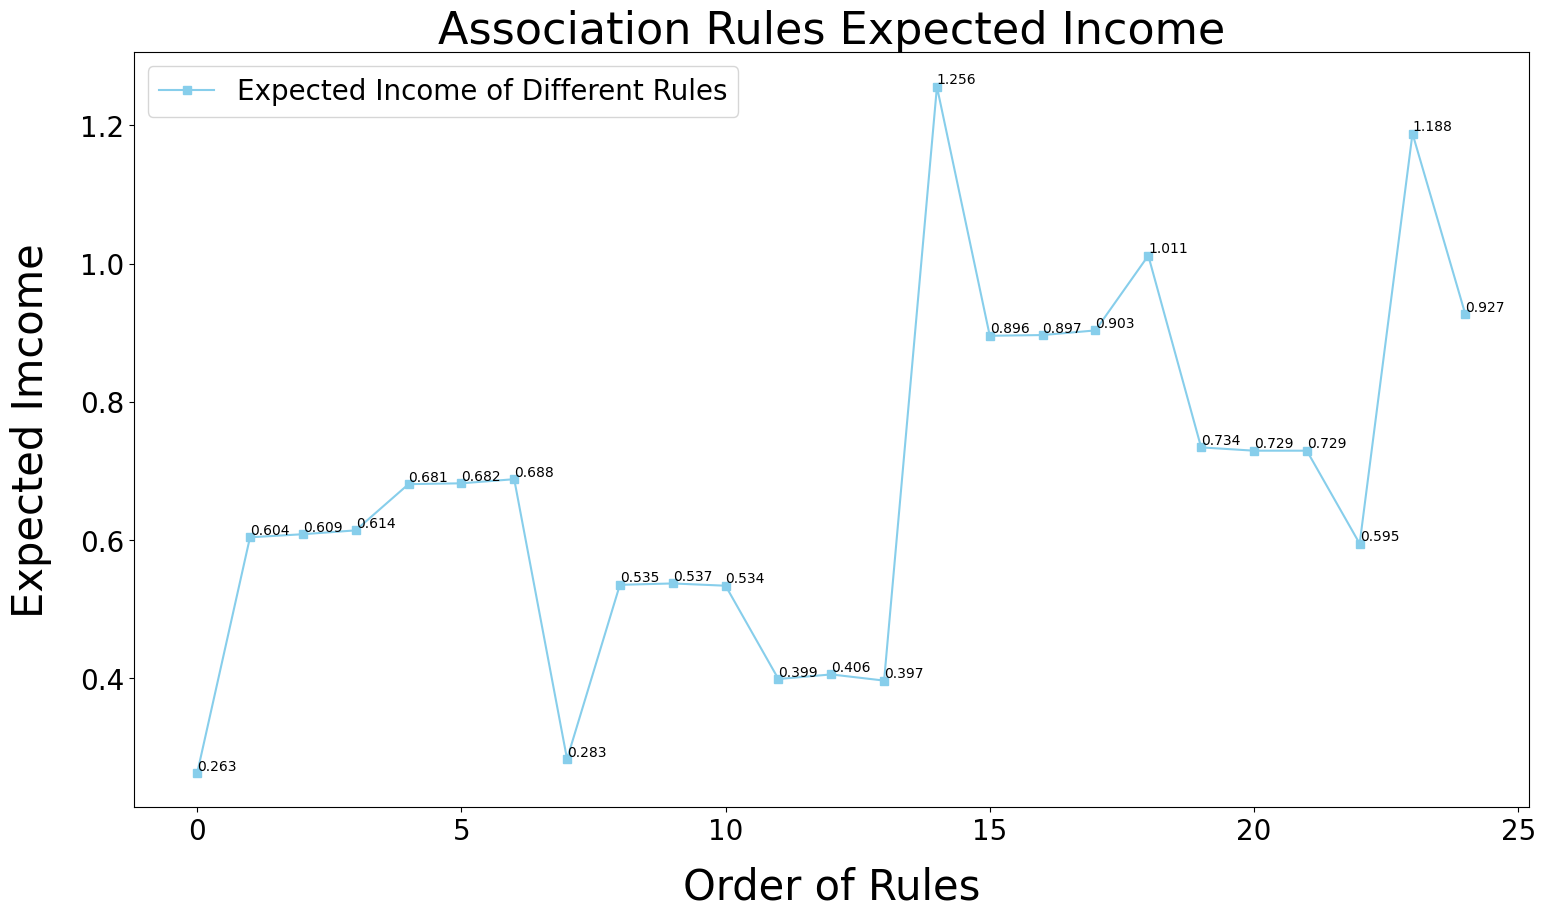

In [28]:
# import matplotlib相關套件
import matplotlib.pyplot as plt

# 規則的順序
n = [x for x in range(25)]

expected_value = list(cart_under_rule.values())

# 設定圖片大小為長15、寬10
plt.figure(figsize=(18,10),dpi=100,linewidth = 2)

# 把資料放進來並指定對應的X軸、Y軸的資料，用方形做標記(s-)，並指定線條顏色為紅色，使用label標記線條含意
plt.plot(n,expected_value,'s-',color = 'skyblue', label="Expected Income of Different Rules")

# 設定刻度字體
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# 標點
for x,y in zip(n,expected_value):
    plt.text(x,y,"{:.3f}".format(y),verticalalignment='bottom',fontsize=10)

# 設定圖的標題
plt.title("Association Rules Expected Income",fontsize=32)

# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Order of Rules", fontsize=30, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Expected Imcome", fontsize=30, labelpad = 20)

# 顯示出線條標記位置
plt.legend(loc = "best", fontsize=20)

# 畫出圖片
plt.show()

將規則按照收益多寡由大到小排序

In [29]:
{k: v for k, v in sorted(cart_under_rule.items(), key=lambda item: item[1],reverse=True)}

{'其他SE樹莓派散熱器 → 主板RaspberryPI3B+': 1.2556790336039843,
 '6-INK-EPT664200 → 6-INK-EPT664400, 6-INK-EPT664100, 6-INK-EPT664300': 1.1880631018451064,
 '6-INK-EPT664200 → 6-INK-EPT664400, 6-INK-EPT664300': 1.011468005351206,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y200藍, 6-INKEPT03Y400黃, 6-INKEPT03Y300紅': 0.926632846338265,
 '6-INK-EPT664300 → 6-INK-EPT664400, 6-INK-EPT664100': 0.9032835741817556,
 '6-INK-EPT664200 → 6-INK-EPT664400, 6-INK-EPT664100': 0.8965760228883267,
 '6-INK-EPT664200 → 6-INK-EPT664100, 6-INK-EPT664300': 0.8955137290223453,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y200藍, 6-INKEPT03Y300紅': 0.734100692742758,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y200藍, 6-INKEPT03Y400黃': 0.7293269931255546,
 '6-INKEPT03Y100黑防 → 6-INKEPT03Y400黃, 6-INKEPT03Y300紅': 0.7293269931255546,
 '6-INK-EPT664300 → 6-INK-EPT664400': 0.6880882684080162,
 '6-INK-EPT664200 → 6-INK-EPT664400': 0.6821436613375366,
 '6-INK-EPT664200 → 6-INK-EPT664300': 0.6809277189822113,
 '6-INK-EPT664400 → 6-INK-EPT664100': 0.6140747314462827,
 '6-